In [40]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
%matplotlib inline

## Logistische Regression

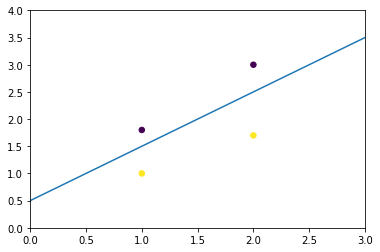

In [153]:
X1 = [1,2,1,2]
X2 = [1,1.7,1.8,3]
Y = [1,1,0,0]

plt.scatter(X1, X2, c=Y, s=30)
plt.plot([0,3],[0.5,3.5])

plt.axis([0, 3, 0, 4])
plt.show()

Aufgabe ist es, eine Trennung zwischen den gelben und lila Punkten zu finden. Dazu können wir die Gleichung einer
Geraden aufstellen $y = x + 0.5$. Wir wählen eine andere Darstellung der Geraden, die sich besser auf höhere Dimensionen verallgemeinern lässt, analog zur *Koordinatenform* einer Ebene.

$w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0 $

In unserem Fall:

$x_1 - x_2 + 0.5 = 0$

In [113]:
w1, w2, b = 1, -1, 0.5
for x1,x2,y in zip(X1,X2,Y):
    z = w1*x1 + w2*x2 + b
    print(round(z,2))

0.5
0.8
-0.3
-0.5


Die positiven Ergebnisse gehören zu den gelben Punkten. Je weiter die Punkte weg sind, desto größer der Betrag der Zahl.

Ziel ist es, Parameter $w_1, w_2, b$ zu finden, die ermittelt, ob ein Punkt gelb ist. Zu Beginn kennt unser Algorithmus diese Parameter noch nicht und beginnt mit einer zufälligen Wahl.


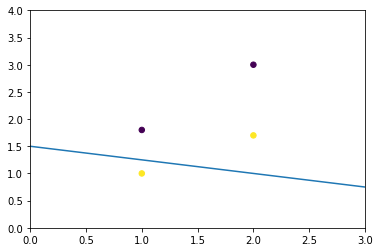

In [115]:
def get_x2(x1,w1,w2,b):
    return -(w1*x1+b)/w2

w1, w2, b = -1, -4, 6

plt.scatter(X1, X2, c=Y, s=30)
plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])

plt.axis([0, 3, 0, 4])
plt.show()

Wir setzen die Koordinaten der Punkte in die Gleichung ein:


In [116]:
for x1,x2,y in zip(X1,X2,Y):
    z = w1*x1 + w2*x2 + b
    print(round(z,2))

1
-2.8
-2.2
-8


#### Die Sigmoid-Funktion

Wir möchten die Zahlen als Wahrscheinlichkeiten interpretieren, dass ein Punkt gelb ist. Dazu mappen wir die Werte mit der Sigmoid-Funktion auf den Bereich zwischen 0 und 1

$$sigmoid(z) = \frac{1}{1+e^{-z}}$$

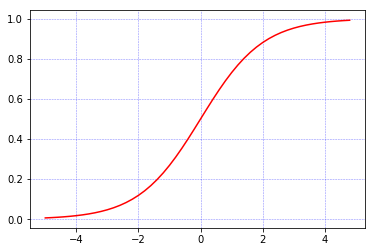

In [117]:
# Darstellung der sigmoid-Funktion
def sigmoid(z):
    return 1 / ( 1 + math.e ** (-z))

x = np.arange(-5., 5., 0.2)
plt.plot(x, sigmoid(x), 'red')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

Ein Wert größer als $0.5$ bedeutet, dass unser Algorithmus die Farbe Gelb vermutet.

In [121]:
for x1,x2,y in zip(X1,X2,Y):
    z = w1*x1 + w2*x2 + b
    a = sigmoid(z)
    print(round(a,4))


0.7311
0.0573
0.0998
0.0003


#### Kostenfunktion der logistischen Regression

Um die Güte unserer Parameter w1, w2 und b zu messen, vergleichen wir jeden Punkt x1,...,x4 die berechneten Werte in a mit den tatsächlichen Werten y. Ein möglicher Kennwert für den Fehler wäre das Quadrat der Differenz für jeden Punkt. Die Kosten wären dann der mittlere quadratische Fehler (mse, mean squared error)


In [123]:
for x1,x2,y in zip(X1,X2,Y):
    z = w1*x1 + w2*x2 + b
    a = sigmoid(z)
    error = (a - y)**2
    print(round(error,4))

0.0723
0.8886
0.01
0.0


Es stellt sich heraus, dass diese Kennzahl nicht so gut geeignet ist, da sie auf eine nicht-konvexe Kostenfunktion führen kann. 
Die Optimierung der Kostenfunktion kann daher in lokalen Minima stecken bleiben. Stattdessen benutzt man folgende Fehlerfunktion
(Loss-function):

$$L(y,a) = - (y \cdot \ln{a} + (1-y) \cdot \ln(1-a))$$

1. Fall: $y = 1 \Rightarrow L(y,a) = - \ln{a} \Rightarrow $ Die Loss-Funktion geht gegen 0, wenn sich $a$ der 1 nähert. 

2. Fall: $y = 0 \Rightarrow L(y,a) = - \ln{(1-a)} \Rightarrow $ Die Loss-Funktion geht gegen 0, wenn sich $a$ der 0 nähert. 

Die Fehlerwerte für unsere vier Punkte:

In [124]:
for x1,x2,y in zip(X1,X2,Y):
    z = w1*x1 + w2*x2 + b
    a = sigmoid(z)
    error = -(y*math.log(a)+(1-y)*math.log(1-a))
    print(round(error,4))


0.3133
2.859
0.1051
0.0003


Die Kostenfunktion $J$ ermittelt den mittleren Fehler. Bei gegebener Probleminstanz sind die Punkte $X$ und ihre Farben $Y$ gegeben und die Kostenfunktion $J$ ist abhängig von $w1, w2$ und $b$.

In [125]:
def J(w1, w2, b):
    cost = 0
    for x1,x2,y in zip(X1,X2,Y):
        z = w1*x1 + w2*x2 + b
        a = sigmoid(z)
        error = -(y*math.log(a)+(1-y)*math.log(1-a))
        cost = cost + error
    return cost / len(Y)

print(J())

Für ein konkrete Probleminstanz sind die Punkte X und ihre Farbe Y gegeben. Die Kosten sind abhängig von den gewählten w1, w2, und b. Diese Parameter versuchen wir so zu wählen, dass die Kosten möglichst klein werden.

In [108]:
def J(w1,w2,b):
    cost = 0
    for (x1,x2,y) in zip(X1,X2,Y):
        z = w1*x1 + w2*x2 + b 
        a = sigmoid(z)
        cost = cost + L(a,y)
    return cost/len(Y)

In [127]:
print(J(-1, -4, 6))
print(J(1, -1, 0.5))

0.8194283099869467
0.4684024696941295


#### Gradient Descent

Um das Minimum für die Kostenfunktion zu finden bestimmen wir den Gradienten der Kostenfunktion. Der gibt die Richtung des steilsten Abstiegs an.

In [130]:
from sympy import *
init_printing(use_unicode=True)
x1, x2, b, z, a, y = symbols('x1 x2 b z a y')
s, L = symbols('s g', cls=Function)

# Ein Punkt Beispiel

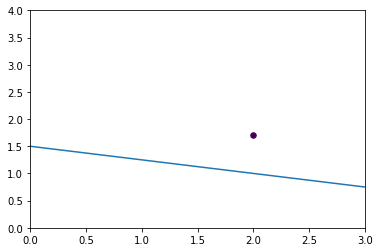

In [196]:
x1, x2 = 2, 1.7
y = 1
def get_x2(x1,w1,w2,b):
    return -(w1*x1+b)/w2

w1, w2, b = -1, -4, 6

plt.scatter([x1], [x2], c=[1], s=30)
plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])
plt.axis([0, 3, 0, 4])
plt.show()

In [197]:
z = w1*x1 + w2*x2 + b
a = sigmoid(z)
error = -(y*math.log(a)+(1-y)*math.log(1-a))
print(round(z,2),round(a,2),round(error,4))

-2.8 0.06 2.859


In [230]:
w1, w2, b = -1, -4, 6
learning_rate = 0.1

for i in range(25):
    z = w1*x1 + w2*x2 + b 
    a = sigmoid(z)
    dz = a - y
    db = dz
    dw1 = dz * a
    dw2 = dz * a
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b = b - learning_rate * db
    
cost = -(y*math.log(a)+(1-y)*math.log(1-a))
print(cost,w1,w2,b)

0.501083205426419 -0.5907394144839084 -3.5907394144839073 7.84350245231288


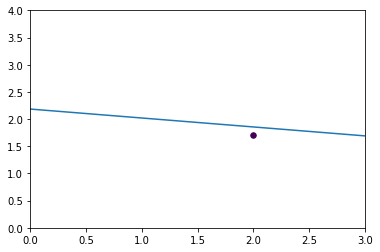

In [231]:
plt.scatter([x1], [x2], c=[1], s=30)
plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])
plt.axis([0, 3, 0, 4])
plt.show()

In [594]:
# Ein Punkt-Beispiel
X = np.array([[2],[1.7]]) 
Y = np.array([[1]])
learning_rate = 0.1
num_iterations = 25

W1 = np.array([[-1,-4]]) 
b1 = np.array([[6]])
 
for i in range(num_iterations):
    # forward propagation
    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)

    # backward propagation
    dZ1 = A1 - Y
    dW1 =  np.matmul(dZ1,A1.T)
    db1 =  np.sum(dZ1, axis = 1, keepdims = True)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    

logprobs = np.multiply(np.log(A1),Y) + np.multiply(1 - Y,np.log(1-A1))
cost = - (np.sum(logprobs))
cost = np.squeeze(cost)  
print (cost, w1, w2, b)


AttributeError: 'float' object has no attribute 'T'

## Zwei Punkte Beispiel

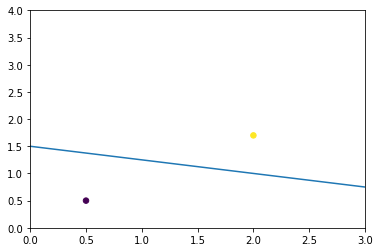

In [256]:
X1 = [0.5, 2]
X2 = [0.5, 1.7]
Y = [0, 1]


def get_x2(x1,w1,w2,b):
    return -(w1*x1+b)/w2

w1, w2, b = -1, -4, 6

plt.scatter(X1, X2, c=Y, s=30)
plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])
plt.axis([0, 3, 0, 4])
plt.show()

In [270]:
def predict(x1,x2):
    z = w1*x1 + w2*x2 + b
    return sigmoid(z)

for (x1,x2,y) in zip(X1,X2,Y):
    print(predict(x1,x2),y)

0.9693558372873504 [0 1]


In [607]:
# Vierpunkte Beispiel
def sigmoid(x):
    return 1/(1+np.exp(-x))

X = np.array([[0.5, 2, 1.5, 1.0],[0.5, 1.7, 2.5, 3.0]]) 
Y = np.array([[0, 1, 1, 0]])

W = np.array([[-1,-4]]) 
b = np.array([[6]])

learning_rate = 0.1
num_iterations = 700
m = len(Y[0])
 
for i in range(num_iterations):
    # forward propagation
    Z = np.matmul(W,X) + b
    A = sigmoid(Z)
    logprobs = - (np.multiply(np.log(A),Y) + np.multiply(1 - Y,np.log(1-A)))
    cost = 1/m * (np.sum(logprobs))
    dZ = A - Y
    dW =  1/m * np.matmul(dZ,X.T)
    db =  1/m * np.sum(dZ, axis = 1, keepdims = True)
    W = W - learning_rate * dW
    b = b - learning_rate * db
 
print(W, b)


[[ 3.19721653 -0.88628714]] [[-1.78773177]]


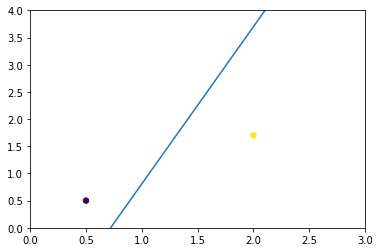

In [281]:
X1 = [0.5, 2]
X2 = [0.5, 1.7]
Y = [0, 1]


def get_x2(x1,w1,w2,b):
    return -(w1*x1+b)/w2

plt.scatter(X1, X2, c=Y, s=30)
plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])
plt.axis([0, 3, 0, 4])
plt.show()

In [548]:
class Punkt:
    def __init__(self,x1,x2,y):
        self.x1 = x1
        self.x2 = x2
        self.y  = y
    
    def __str__(self):
        return '({}/{})'.format(self.x1, self.x2)
    
    def getZ(self,w1,w2,b):
        return w1*self.x1 + w2*self.x2 + b
    
    def getA(self,w1,w2,b):
        return self.sigmoid(self.getZ(w1,w2,b))
    
    def sigmoid(self,z):
        return 1/(1 + math.exp(-z))
    
    def getL(self,w1,w2,b):
        a = self.getA(w1,w2,b)
        return -(self.y*math.log(a)+(1-self.y)*math.log(1-a))
    
    def getDz(self,w1,w2,b):
        return self.getA(w1,w2,b)-self.y
    
    def getDw1(self,w1,w2,b):
        return self.getDz(w1,w2,b) * self.x1
    
    def getDw2(self,w1,w2,b):
        return self.getDz(w1,w2,b) * self.x2
        
def showline(pl,w1,w2,b):
    X1 = [p.x1 for p in pl]
    X2 = [p.x2 for p in pl]
    Y = [p.y for p in pl]
    plt.scatter(X1, X2, c=Y, s=30)
    plt.plot([0,3],[get_x2(0,w1,w2,b),get_x2(3,w1,w2,b)])
    plt.axis([0, 3, 0, 4])
    plt.show()    
    
    

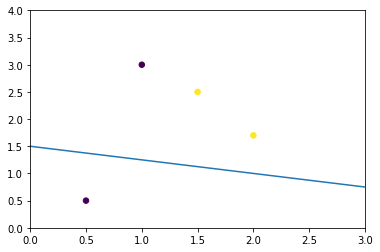

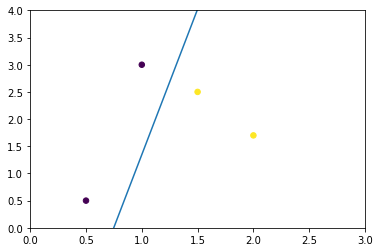

10.835167806389206 -2.024092752128046 -8.111555214619882


In [608]:
p1 = Punkt(0.5,0.5,0)
p2 = Punkt(2,1.7,1)
p3 = Punkt(1.5,2.5,1)
p4 = Punkt(1.0,3.0,0)
plist = [p1,p2,p3,p4]

alpha = 0.1
w1, w2, b = -1, -4, 6

showline(plist, w1, w2, b)

m = len(plist)
f = '{:8} {:>10} {:>10} {:>10} {:>10}'
f1 = '{:8} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
f2 = '{:8} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
f0 = '{:8} {:>10} {:>10} {:>10} {:>10} {:>10}'
f3 = '-'*63 + '\nit = {:<6} w1 = {:8.4f}, w2 = {:8.4f}, b = {:8.4f}\n' + '-'*63

zeig = False
if zeig: print(f0.format('','p1','p2','p3','p4','schnitt'))
if zeig: print(f3.format('start',w1,w2,b))
tmp = [str(p) for p in plist]
if zeig: print(f.format('Punkte',*tmp))
tmp= [p.y for p in plist]
if zeig: print(f.format('y',*tmp))

for i in range(7000):
    tmp= [p.getZ(w1,w2,b) for p in plist]
    if zeig: print(f1.format('z',*tmp))
    tmp= [p.getA(w1,w2,b) for p in plist]
    if zeig: print(f1.format('a',*tmp))
    tmp= [p.getL(w1,w2,b) for p in plist]
    tmpavg = 1/m * sum(tmp)
    if zeig: print(f2.format('loss',*tmp,tmpavg))
    tmp= [p.getDz(w1,w2,b) for p in plist]
    db = 1/m * sum(tmp)
    if zeig: print(f1.format('dz',*tmp))
    if zeig: print(f2.format('db',*tmp,db))
    tmp= [p.getDw1(w1,w2,b) for p in plist]
    dw1 = 1/m * sum(tmp)
    if zeig: print(f2.format('dw1',*tmp,dw1))
    tmp= [p.getDw2(w1,w2,b) for p in plist]
    dw2 = 1/m * sum(tmp)
    if zeig: print(f2.format('dw2',*tmp,dw2))
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b =  b - alpha * db
    if zeig: print(f3.format(i,w1,w2,b))
    
showline(plist, w1, w2, b)    
print(w1,w2,b)

In [ ]:
0.9977717689815586 [[ 0.90970436 -1.83401964]] [[3.40441497]]